In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df = pd.read_csv('..\..\data\interim\gurgaon_properties_missing_value_imputation.csv')

In [6]:
df.shape

(3554, 18)

In [7]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [10]:
latlong = pd.read_csv('../../data/interim/latlong.csv')

In [12]:
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [13]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [14]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [15]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [16]:
new_df = df.merge(latlong, on='sector')

In [32]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [38]:
new_df.dtypes

property_type       object
society             object
sector              object
price              float64
price_per_sqft     float64
bedRoom            float64
bathroom           float64
balcony             object
floorNum           float64
agePossession       object
built_up_area      float64
study room         float64
servant room       float64
store room         float64
pooja room         float64
others             float64
furnishing_type    float64
luxury_score       float64
coordinates         object
latitude           float64
longitude          float64
dtype: object

In [47]:
group_df = new_df[['sector','price','price_per_sqft','built_up_area','latitude','longitude']].groupby('sector').mean()

In [48]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
manesar,0.962258,4608.064516,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
sector 10,2.092857,11866.571429,1908.857143,28.4537,77.0009
sector 102,1.696636,10603.822430,1556.130841,28.4750,76.9715
...,...,...,...,...,...
sector 91,1.648235,7586.117647,2028.647059,28.4014,76.9225
sector 92,0.934000,5928.290000,1571.341800,28.4079,76.9153
sector 93,0.848889,8009.888889,1017.000000,28.4153,76.9326


In [49]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [52]:
new_df.to_csv('data_viz1.csv',index=False)

In [20]:
df1 = pd.read_csv('..\..\data\interim\gurgaon_properties.csv')

In [21]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,3 BHK Flat in Sector 36 Sohna,flat,signature global park 4,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,not available,"144, Sector 36 Sohna, Gurgaon, Haryana",2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall ...",We need to shift somewhere else,NaN,"['Lift(s)', 'Park']",NaN
1,2 BHK Flat in Sector 89 Gurgaon,flat,smart world gems,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room","O 118d, Sector 89 Gurgaon, Gurgaon, Haryana",4.0,NaN,Within 6 months,"['Sant Soordas Sihi Metro Station', 'Airia Mal...",Smartworld gem4 th floor new construction,NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s...","['Environment4 out of 5', 'Lifestyle4 out of 5..."
2,2 BHK Flat in Sector 86 Gurgaon,flat,pyramid elite,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,not available,"Sector 86 Gurgaon, Gurgaon, Haryana",0.0,NaN,Under Construction,"['V3S Sapphire Ninety Mall', 'Sector 86 Road',...",Near to dwarka expressway\nNear to airport,[],"['Intercom Facility', 'Lift(s)', 'Park']","['Environment5 out of 5', 'Safety4.5 out of 5'..."
3,2 BHK Flat in Sohna,flat,breez global hill view,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,not available,"1701 & 1708, Sohna, Gurgaon, Haryana",17.0,NaN,0 to 1 Year Old,"['Huda City Centre', 'Omaxe City Centre', 'Nin...",Both adjacent properties available which can b...,[],"['Feng Shui / Vaastu Compliant', 'Security / F...","['Safety4 out of 5', 'Lifestyle4 out of 5', 'E..."
4,3 BHK Flat in Sector 92 Gurgaon,flat,bestech park view sanskruti,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,"servant room,others","Sector 92 Gurgaon, Gurgaon, Haryana",10.0,North-West,1 to 5 Year Old,"['Sapphire 93 Mall', 'Dwarka Expressway', 'NH-...",Check out this 3 bhk apartment for sale in bes...,"['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Ge...","['Centrally Air Conditioned', 'Water purifier'...","['Green Area5 out of 5', 'Construction5 out of..."


In [22]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [23]:
wordcloud_df.head()

,features,sector
0,"['Lift(s)', 'Park']",sector 36
1,"['Power Back-up', 'Intercom Facility', 'Lift(s...",sector 89
2,"['Intercom Facility', 'Lift(s)', 'Park']",sohna road
3,"['Feng Shui / Vaastu Compliant', 'Security / F...",sector 92
4,"['Centrally Air Conditioned', 'Water purifier'...",sector 102


In [24]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [25]:
main

['Lift(s)',
 'Park',
 'Power Back-up',
 'Intercom Facility',
 'Lift(s)',
 'Swimming Pool',
 'Park',
 'Piped-gas',
 'Internet/wi-fi connectivity',
 'Fitness Centre / GYM',
 'Club house / Community Center',
 'Intercom Facility',
 'Lift(s)',
 'Park',
 'Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Park',
 'Visitor Parking',
 'Centrally Air Conditioned',
 'Water purifier',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'Intercom Facility',
 'Lift(s)',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Bank Attached Property',
 'Piped-gas',
 'Internet/wi-fi connectivity',
 'Recently Renovated',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Natural Light',
 'Airy Rooms',
 'Spacious Interiors',
 'Low Density Society',
 'Waste Disposal',

In [26]:
from wordcloud import WordCloud

In [27]:
feature_text = ' '.join(main)

In [28]:
import pickle
pickle.dump(feature_text, open('../../streamlit_app/datasets/feature_text.pkl','wb'))

In [29]:
feature_text

'Lift(s) Park Power Back-up Intercom Facility Lift(s) Swimming Pool Park Piped-gas Internet/wi-fi connectivity Fitness Centre / GYM Club house / Community Center Intercom Facility Lift(s) Park Feng Shui / Vaastu Compliant Security / Fire Alarm Intercom Facility Lift(s) Maintenance Staff Water Storage Park Visitor Parking Centrally Air Conditioned Water purifier Security / Fire Alarm Feng Shui / Vaastu Compliant Private Garden / Terrace Intercom Facility Lift(s) High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Separate entry for servant room No open drainage around Bank Attached Property Piped-gas Internet/wi-fi connectivity Recently Renovated Visitor Parking Swimming Pool Park Security Personnel Natural Light Airy Rooms Spacious Interiors Low Density Society Waste Disposal Rain Water Harvesting Water softening plant Shopping Centre Fitness Centre / GYM Club house / Community Center Centrally Air Conditioned Water purifier Security / Fire Alarm Feng Shui / Vaas

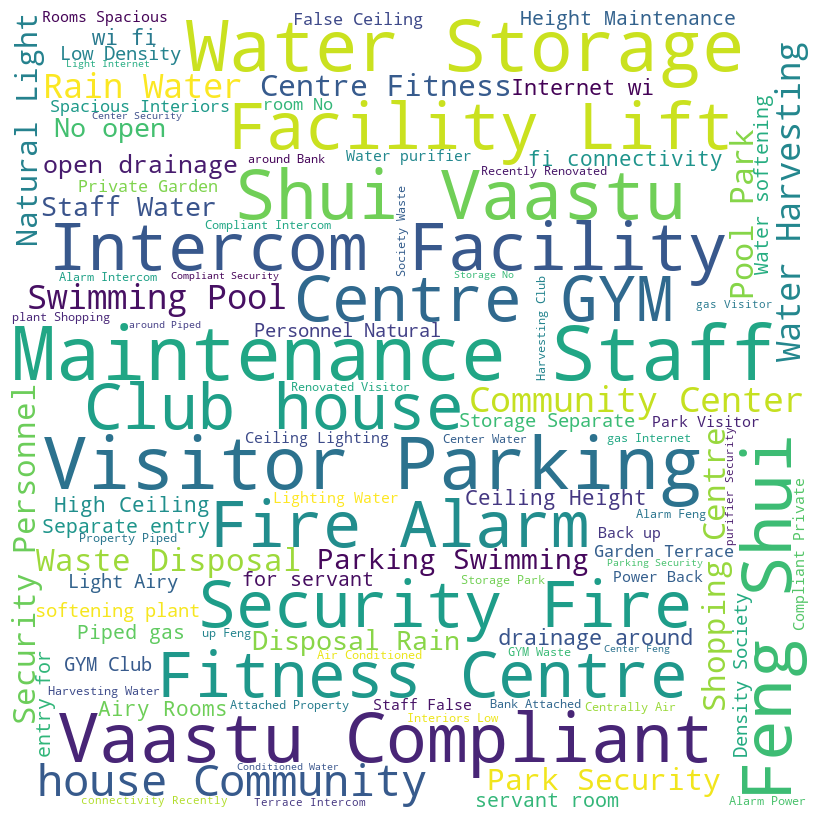

In [30]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() # st.pyplot()

In [31]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

In [144]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

In [105]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

In [109]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()


C:\Users\Nitish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Nitish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='price', ylabel='Density'>

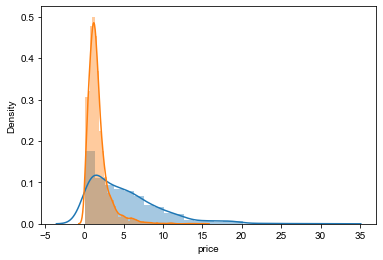

In [111]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])

In [150]:
new_df['sector'].unique().tolist().insert(0,'overall')